In [130]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Leitura e Criação de Dataframe

Aqui a gente recebe o dataset e tranforma ele em um dataframe

In [132]:
df_unistudents = pd.read_csv('../data/unistudents.csv', low_memory=False)
pd.set_option('display.max_columns', None)

# Observando o dataset

Fazendo as primeiras observações sobre o dataset e obtendo informações básicas

In [133]:
df_unistudents.head(25)

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,Financial_Status,Parental_Involvement,Educational_Resources,Motivation,Self_Esteem,Stress_Levels,School_Environment,Professor_Quality,Class_Size,Extracurricular_Activities,Sleep_Patterns,Nutrition,Physical_Activity,Screen_Time,Educational_Tech_Use,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
0,22.0,F,College,50000.0,A,81.0,Medium,8.0,Law,Private,Low,High,Yes,Medium,Low,High,Negative,Medium,39.0,Yes,6.0,Unhealthy,Low,3.0,Yes,Neutral,NaN,No,Visual,Yes,NaN,Low,2.0,NaN,B
1,21.0,M,NaN,60000.0,A,NaN,Medium,12.0,Law,Public,Low,Low,Yes,NaN,High,NaN,Negative,High,75.0,Yes,5.0,Healthy,Low,9.0,No,Negative,No,No,Auditory,Yes,Yes,Medium,5.0,High,NaN
2,19.0,M,College,75000.0,C,93.0,Medium,12.0,Law,Private,Low,Medium,No,Low,Low,High,Positive,Medium,46.0,No,6.0,Unhealthy,High,7.0,No,Neutral,No,Yes,NaN,No,No,Low,2.0,High,A
3,21.0,M,College,60000.0,A,86.0,Low,15.0,Business,Public,Medium,Low,No,High,Medium,Medium,Positive,High,NaN,Yes,5.0,NaN,High,9.0,Yes,Neutral,No,NaN,Auditory,Yes,Yes,Low,3.0,Medium,C
4,19.0,NaN,NaN,40000.0,NaN,89.0,High,15.0,Medicine,NaN,Medium,Low,Yes,High,NaN,High,Negative,NaN,41.0,Yes,4.0,Unhealthy,Low,9.0,Yes,Positive,No,No,Auditory,Yes,NaN,Medium,3.0,High,B
5,19.0,M,College,40000.0,C,82.0,Medium,14.0,Law,Private,High,Low,Yes,High,High,Low,Negative,Low,NaN,No,8.0,Balanced,Medium,NaN,Yes,NaN,No,Yes,Auditory,NaN,No,Low,5.0,NaN,C
6,20.0,NaN,NaN,NaN,A,84.0,Low,13.0,Law,Private,High,Medium,No,NaN,High,High,Positive,High,82.0,NaN,7.0,Healthy,Low,5.0,No,Negative,NaN,Yes,NaN,No,No,High,5.0,Medium,A
7,21.0,M,College,40000.0,NaN,75.0,Low,5.0,Business,Public,High,Low,No,NaN,Low,High,Positive,Medium,38.0,Yes,5.0,Balanced,High,6.0,No,Positive,Yes,Yes,Visual,Yes,Yes,High,6.0,High,A
8,19.0,M,High School,75000.0,C,73.0,High,10.0,Law,Public,Low,Low,No,High,Medium,NaN,Positive,High,52.0,Yes,NaN,Unhealthy,Medium,2.0,Yes,Neutral,No,No,Auditory,No,Yes,Low,4.0,High,B
9,21.0,F,Graduate,30000.0,A,81.0,High,6.0,Arts,Private,High,Low,Yes,High,Medium,High,Neutral,NaN,41.0,No,6.0,NaN,Medium,2.0,Yes,Negative,No,No,Visual,Yes,Yes,High,2.0,High,NaN


In [124]:
df_unistudents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10064 entries, 0 to 10063
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          9099 non-null   float64
 1   Gender                       9085 non-null   object 
 2   Parental_Education           9102 non-null   object 
 3   Family_Income                9097 non-null   object 
 4   Previous_Grades              9120 non-null   object 
 5   Attendance                   9060 non-null   float64
 6   Class_Participation          9098 non-null   object 
 7   Study_Hours                  9073 non-null   float64
 8   Major                        9136 non-null   object 
 9   School_Type                  9115 non-null   object 
 10  Financial_Status             9129 non-null   object 
 11  Parental_Involvement         9118 non-null   object 
 12  Educational_Resources        9129 non-null   object 
 13  Motivation      

In [125]:
df_unistudents.describe()

,Age,Attendance,Study_Hours,Class_Size,Sleep_Patterns,Screen_Time,Time_Wasted_on_Social_Media
count,9099.000000,9060.000000,9073.000000,9114.000000,9048.000000,9120.000000,9137.000000
mean,19.996703,84.908499,12.467761,60.238754,6.538904,6.031469,3.489329
std,1.406885,8.985221,4.613845,23.337209,1.720632,2.597880,1.704057
min,18.000000,70.000000,5.000000,20.000000,4.000000,2.000000,1.000000
25%,19.000000,77.000000,9.000000,40.000000,5.000000,4.000000,2.000000
50%,20.000000,85.000000,12.000000,61.000000,7.000000,6.000000,3.000000
75%,21.000000,93.000000,16.000000,80.000000,8.000000,8.000000,5.000000
max,22.000000,100.000000,20.000000,100.000000,9.000000,10.000000,6.000000


In [126]:
df_unistudents.shape

(10064, 35)

Outra verificação importante no tratamento dos dados é a quantidade de dados duplicados do nosso dataset

In [128]:
print(df_unistudents.duplicated().sum())

0


In [129]:
df_unistudents.isnull().sum()

Age                             965
Gender                          979
Parental_Education              962
Family_Income                   967
Previous_Grades                 944
Attendance                     1004
Class_Participation             966
Study_Hours                     991
Major                           928
School_Type                     949
Financial_Status                935
Parental_Involvement            946
Educational_Resources           935
Motivation                      970
Self_Esteem                     912
Stress_Levels                   919
School_Environment              958
Professor_Quality               950
Class_Size                      950
Extracurricular_Activities      905
Sleep_Patterns                 1016
Nutrition                       977
Physical_Activity               974
Screen_Time                     944
Educational_Tech_Use            993
Peer_Group                      919
Bullying                        975
Study_Space                 

# Análise Univariada - Estatísticas Descritivas

Nesta etapa, vamos explorar as estatísticas descritivas das variáveis numéricas do dataset.  
O objetivo é entender a centralidade (média, mediana), dispersão (desvio padrão, quartis) e valores extremos (mínimo, máximo) de cada variável.

### Perguntas para esta análise:
- Qual a média de tempo de tela dos alunos (`Screen_Time`)? Ela varia muito?
- Para as variáveis numéricas, existem valores extremos ou fora do esperado?
- Como se distriui as horas de estudo (`Study_Hours`)?

In [87]:
num_col=df_unistudents.select_dtypes(include=['float64']).columns # identifica as colunas numéricas
# pega somente o tipo 'float64' porque os únicos tipos de dados numéricos presente neste dataset são 'float64', conforme analisado anteriormente. Obs.: dtypes: float64(7), object(28)

df_unistudents[num_col].describe() # descreve-as

,Age,Attendance,Study_Hours,Class_Size,Sleep_Patterns,Screen_Time,Time_Wasted_on_Social_Media
count,9099.000000,9060.000000,9073.000000,9114.000000,9048.000000,9120.000000,9137.000000
mean,19.996703,84.908499,12.467761,60.238754,6.538904,6.031469,3.489329
std,1.406885,8.985221,4.613845,23.337209,1.720632,2.597880,1.704057
min,18.000000,70.000000,5.000000,20.000000,4.000000,2.000000,1.000000
25%,19.000000,77.000000,9.000000,40.000000,5.000000,4.000000,2.000000
50%,20.000000,85.000000,12.000000,61.000000,7.000000,6.000000,3.000000
75%,21.000000,93.000000,16.000000,80.000000,8.000000,8.000000,5.000000
max,22.000000,100.000000,20.000000,100.000000,9.000000,10.000000,6.000000


/home/notsogreatdavi/Documents/PISI3-2024.2/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/notsogreatdavi/Documents/PISI3-2024.2/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/notsogreatdavi/Documents/PISI3-2024.2/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/notsogreatdavi/Documents/PISI3-2024.2/venv/lib/python3.10/site-packages/seaborn/_oldcore.py

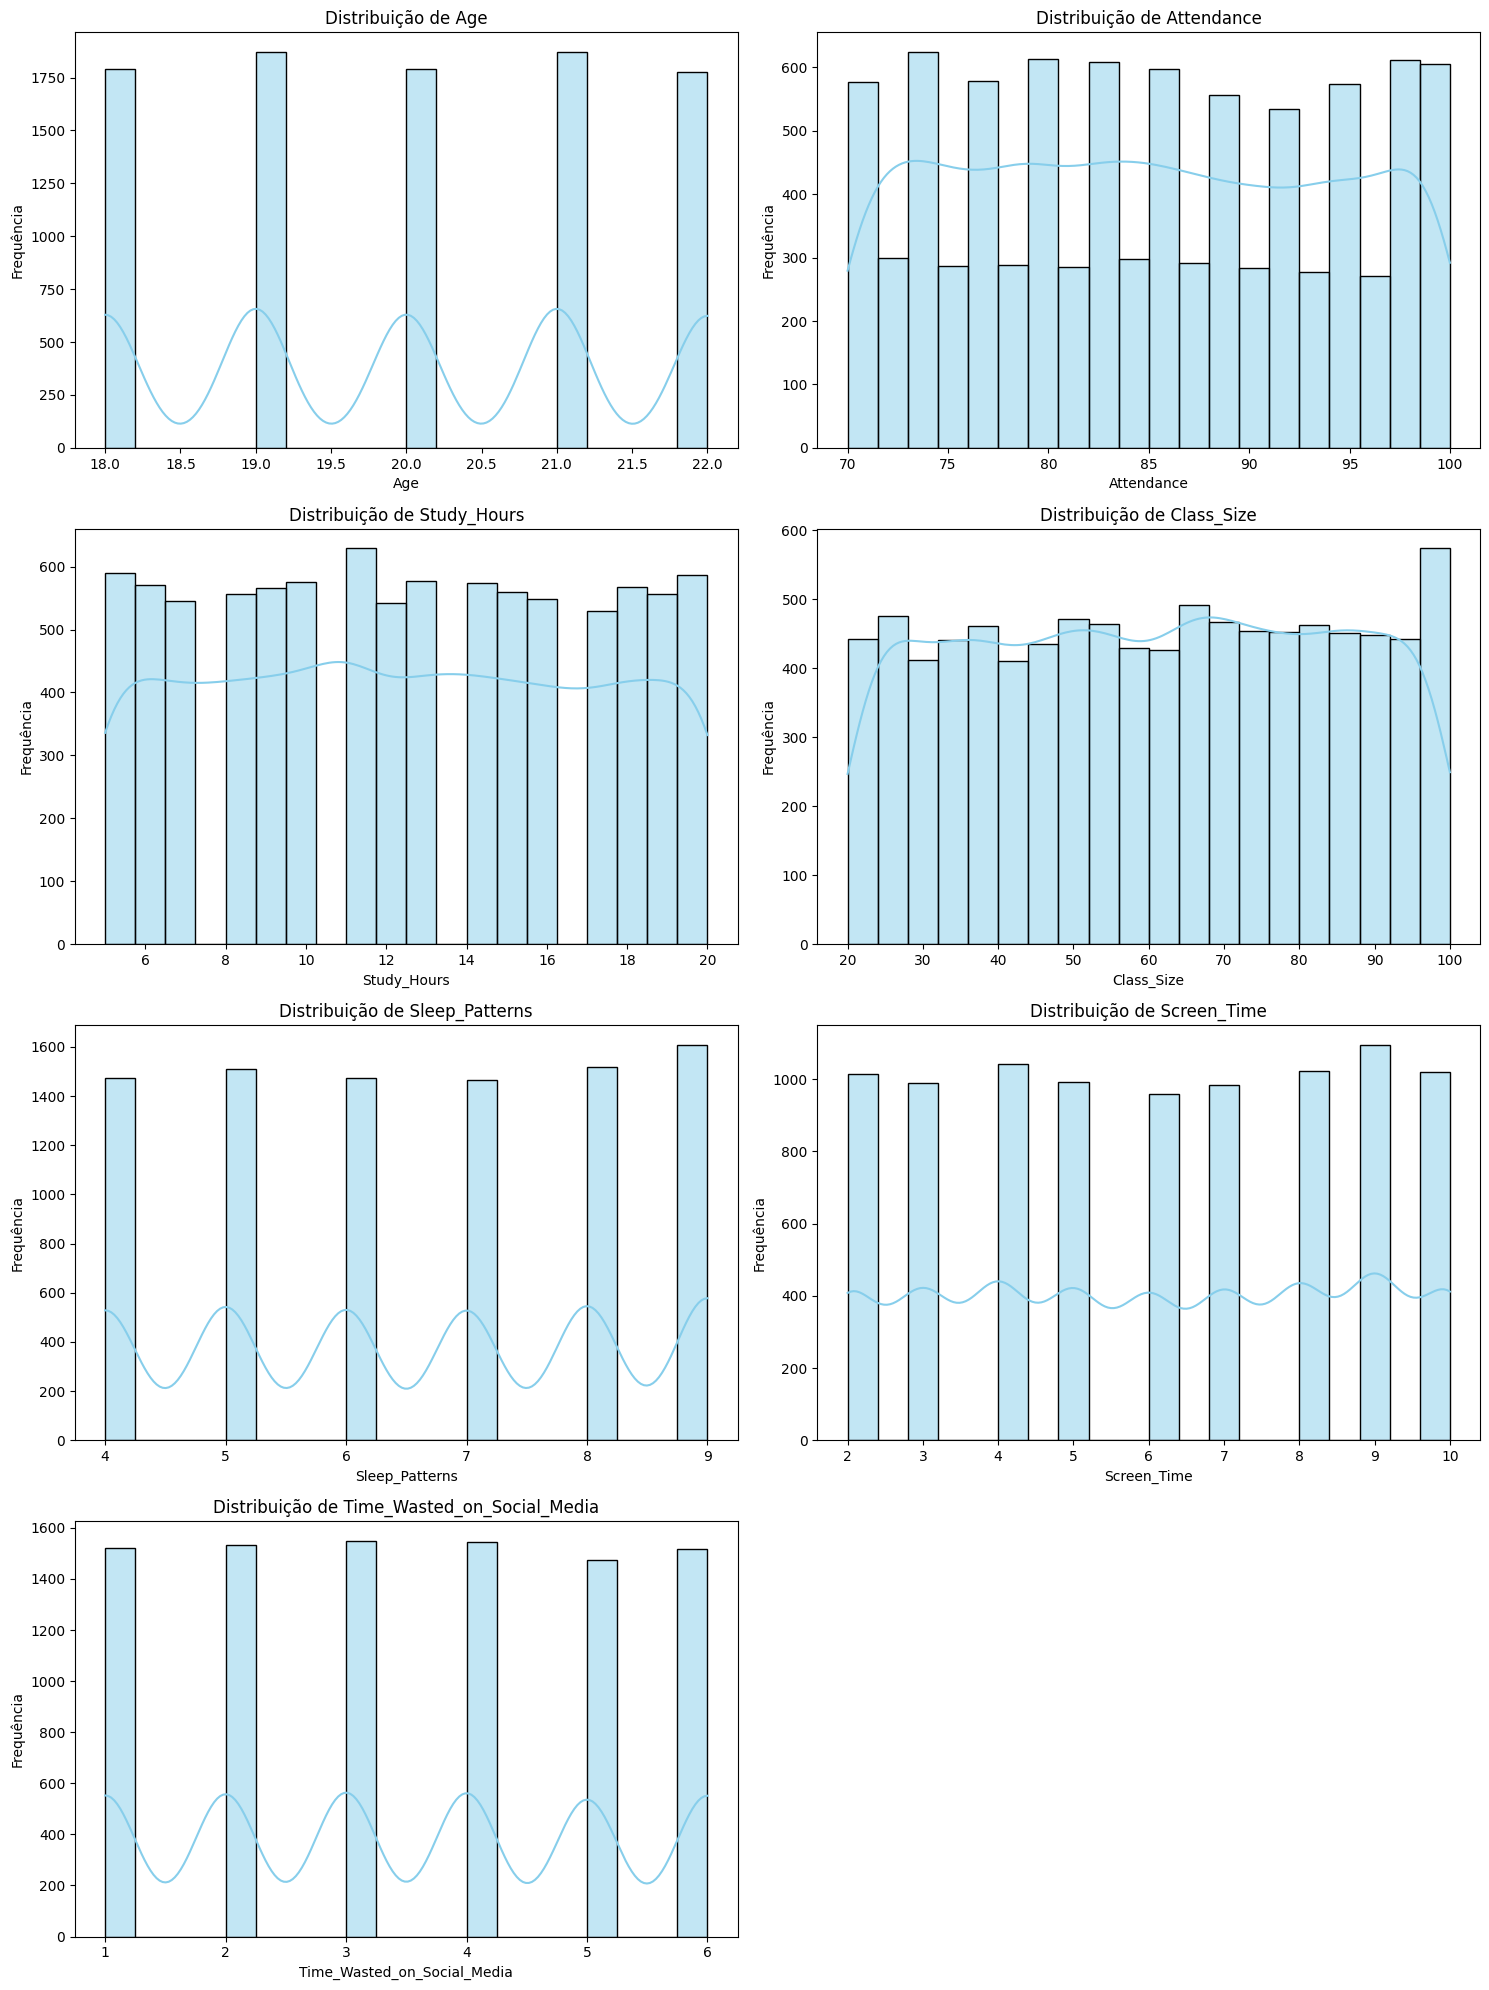

In [88]:
lista_num_col = num_col.tolist()
num_vars = lista_num_col

num_plots = len(num_vars)
num_cols = 2
num_linhas = math.ceil(num_plots / num_cols)

plt.figure(figsize=(15, 5 * num_linhas))
for i, var in enumerate(num_vars, 1):
    plt.subplot(num_linhas, num_cols, i)
    sns.histplot(df_unistudents[var], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribuição de {var}')
    plt.xlabel(var)
    plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

/tmp/ipykernel_6065/2347759106.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


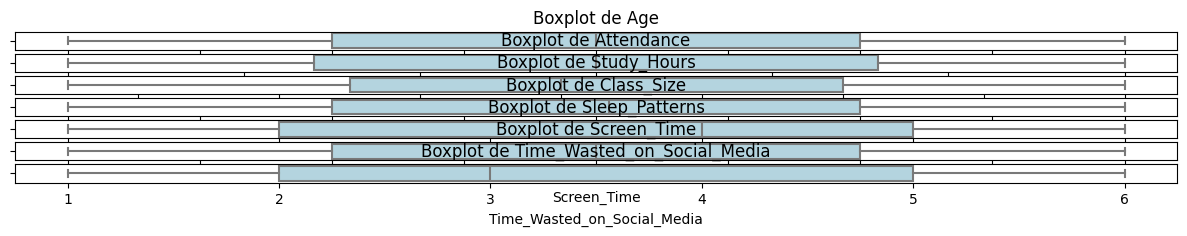

In [135]:
plt.figure(figsize=(15, 10))
for i, var in enumerate(num_vars, 1):
    plt.subplot(num_linhas, num_cols, i)
    sns.boxplot(x=df_unistudents[var], color='lightblue')
    plt.title(f'Boxplot de {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()

Aqui podemos observar que não há outliers presentes nas colunas numéricas, o que é um bom indicativo, contudo, vale ressaltar que ainda falta transformar umas série de colunas de texto para numéricas.

Além disso, já é possível ter uma noção interessante dos valores médios de colunas como `Sleep_Patterns`, `Time_Wasted_on_Social_Media`, etc

## Frequência de Variáveis Categóricas

Nesta etapa, analisaremos a frequência das categorias em variáveis qualitativas.  
Isso ajudará a entender:
- Qual categoria é predominante em cada variável?
- Como os dados estão distribuídos em relação a fatores qualitativos como `Gender`, `School_Type`, `Motivation`, `Grades`, etc.

### Perguntas para esta análise:
- A maioria dos alunos tem acesso a recursos adequados?
- Qual é o nível de motivação predominante entre os alunos?


In [136]:
cat_col=df_unistudents.select_dtypes(include=['object']).columns # identifica as colunas categóricas

df_unistudents[cat_col].describe() # descreve-as

,Gender,Parental_Education,Family_Income,Previous_Grades,Class_Participation,Major,School_Type,Financial_Status,Parental_Involvement,Educational_Resources,Motivation,Self_Esteem,Stress_Levels,School_Environment,Professor_Quality,Extracurricular_Activities,Nutrition,Physical_Activity,Educational_Tech_Use,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Sports_Participation,Grades
count,9085,9102,9097,9120,9098,9136,9115,9129,9118,9129,9094,9152,9145,9106,9114,9159,9087,9090,9071,9145,9089,9057,9080,9133,9118,9136,9108,9024
unique,2,4,6,3,3,6,2,3,3,2,3,3,3,3,3,2,3,3,2,3,2,2,3,2,2,3,3,3
top,F,Some College,50000.0,C,Medium,Business,Public,Low,High,Yes,High,Low,Low,Neutral,Low,Yes,Balanced,High,Yes,Negative,Yes,Yes,Visual,Yes,Yes,High,Low,B
freq,4557,2323,1832,3097,3047,1576,4580,3068,3117,4634,3062,3106,3087,3083,3081,4582,3140,3062,4545,3119,4648,4544,3134,4588,4589,3082,3079,3038


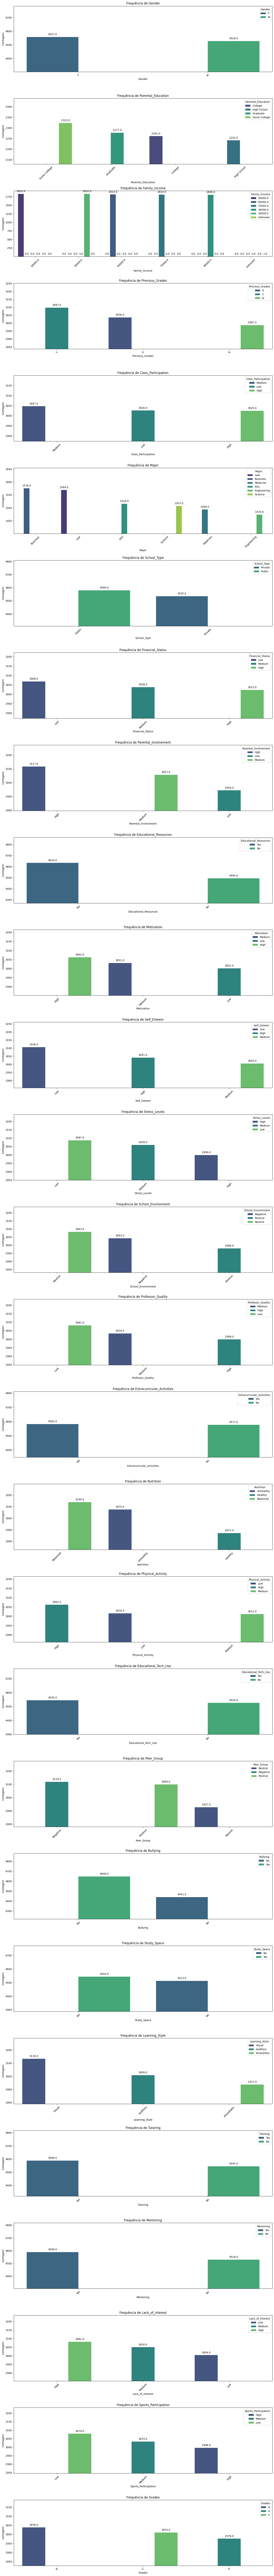

In [137]:
lista_cat_col = cat_col.tolist()
cat_vars = lista_cat_col

cat_plots = len(cat_vars)
num_cols = 1
num_linhas = math.ceil(cat_plots / num_cols)

plt.figure(figsize=(15, 5 * num_linhas))
for i, var in enumerate(cat_vars, 1):
    plt.subplot(num_linhas, num_cols, i)
    ax = sns.countplot(data=df_unistudents, x=var, order=df_unistudents[var].value_counts().index, palette="viridis", hue=var)
    
    max_count = df_unistudents[var].value_counts().max()
    min_count = df_unistudents[var].value_counts().min()
    
    plt.ylim(min_count - min_count * 0.05, max_count + max_count * 0.05)
    
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.title(f'Frequência de {var}')
    plt.xticks(rotation=45)
    plt.xlabel(var)
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

# Análise Multivariada - Correlação entre Variáveis Numéricas

Nesta etapa, vamos investigar a correlação entre as variáveis numéricas do dataset.  
O objetivo é identificar:
- Relações fortes ou fracas entre variáveis contínuas.
- Possíveis preditores da frequência escolar e das horas de estudo (`Attendance`, `Study_Hours`).


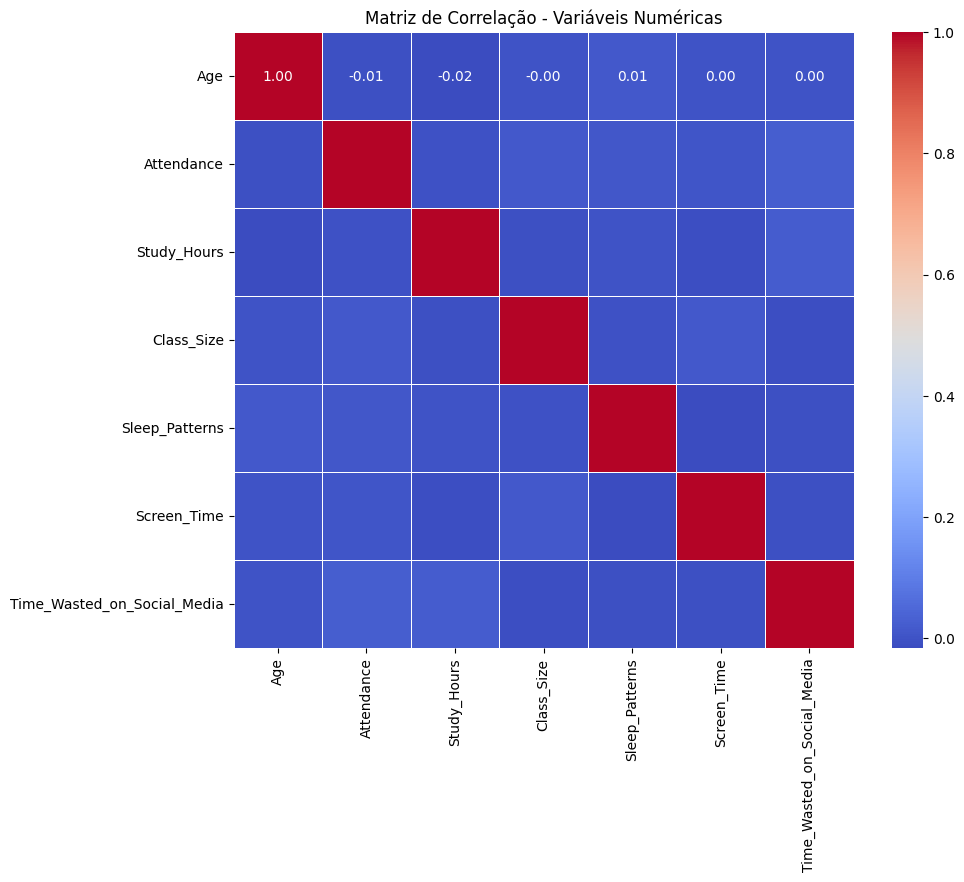

In [92]:
correlation_matrix = df_unistudents[lista_num_col].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.show()


Para compreender melhor a correlação, é pertinente aproximar os valores:

/home/notsogreatdavi/Documents/PISI3-2024.2/venv/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

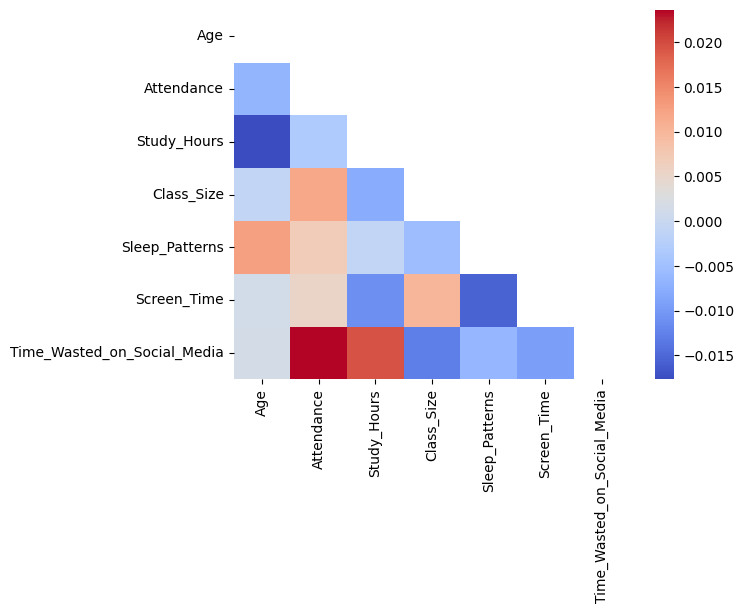

In [93]:
matriz_corr=df_unistudents[num_col].corr()

mascara=np.triu(np.ones_like(matriz_corr,dtype=bool))
sns.heatmap(matriz_corr,annot=True,mask=mascara,cmap= 'coolwarm')

Com esses resultados, é possível inferir que as colunas numéricas apresentadas até então (antes de transformar mais colunas em valores numéricos), possuem pouca relação entre si

# Ajuste da Análise Multivariada - Exploração de Correlações Significativas

Com base na matriz de correlação, decidimos focar nas seguintes relações:
1. `Attendance` e `Time_Wasted_on_Social_Media`: Apresenta uma correlação baixa positiva (0.024).
2. `Study_Hours` e `Time_Wasted_on_Social_Media`: Correlação baixa positiva (0.02).
3. `Screen_Time` e `Sleep_Patterns`: Correlação fraca positiva (-0.016).

## Perguntas a serem exploradas:
- Estudantes que gastam mais tempo nas redes sociais possuem maior frequência?
- Como o tempo gasto nas redes sociais afeta o tempo de estudo?
- O quão impactante é o tempo de tela dos estudantes em seu padrão de sono?

Podemos observar que o tempo gasto em redes sociais é uma variável pouco relevante, contudo, minimamente importante tanto para a frequência, portanto vamos analisar como esses valores se relacionam:

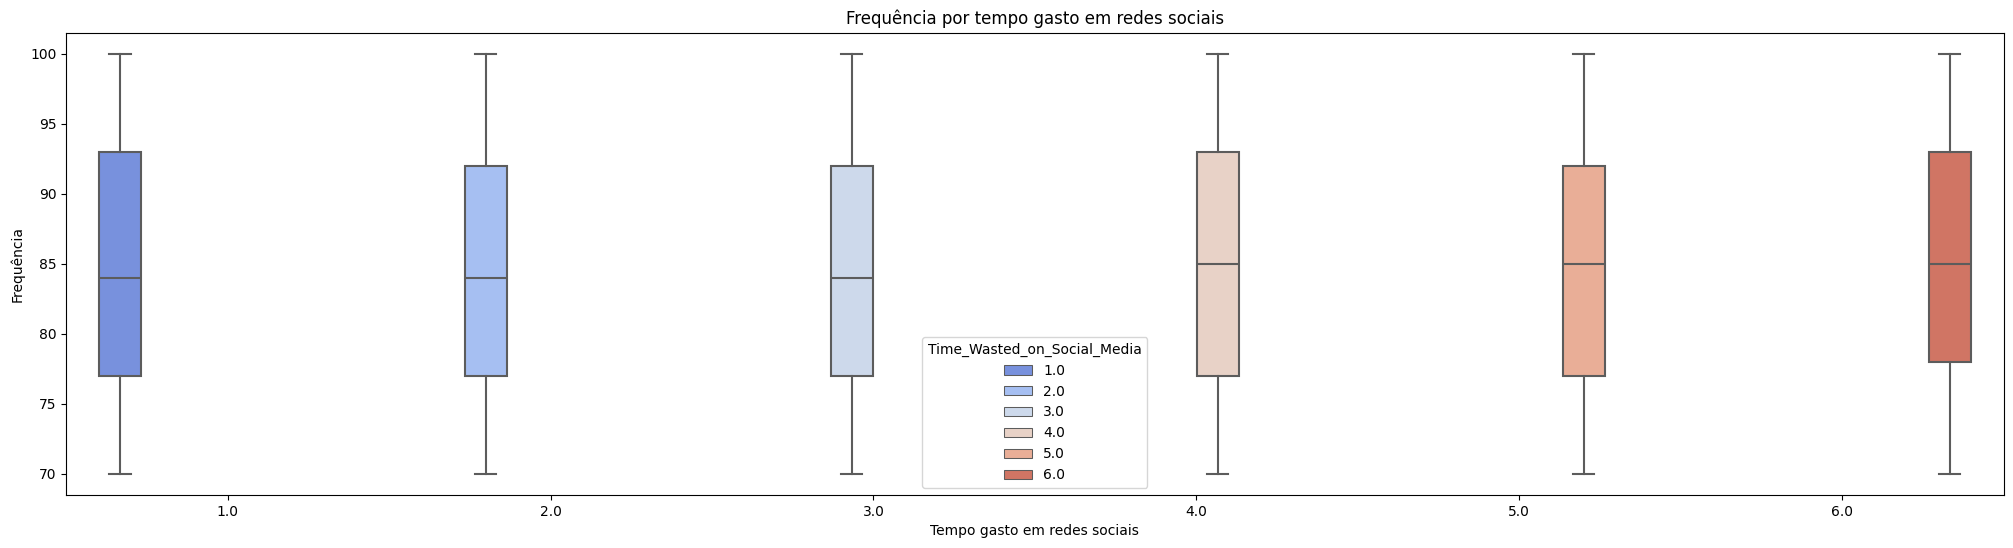

In [94]:
plt.figure(figsize=(25, 6))
sns.boxplot(data=df_unistudents, x='Time_Wasted_on_Social_Media', y='Attendance', palette='coolwarm', hue='Time_Wasted_on_Social_Media')

plt.title('Frequência por tempo gasto em redes sociais')
plt.xlabel('Tempo gasto em redes sociais')
plt.ylabel('Frequência')
plt.show()


Observemos também a relação das horas de estudo com o tempo de redes sociais:

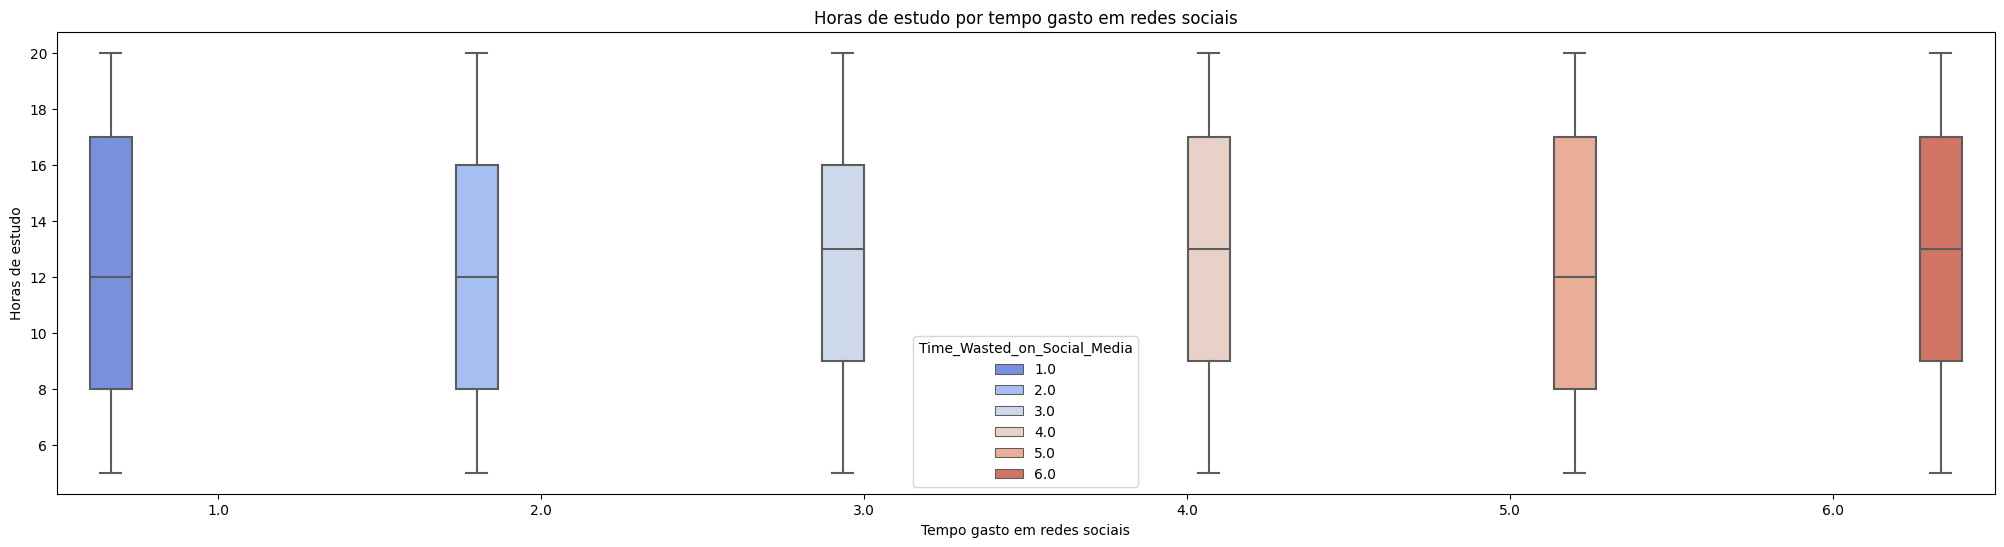

In [95]:
plt.figure(figsize=(25, 6))
sns.boxplot(data=df_unistudents, x='Time_Wasted_on_Social_Media', y='Study_Hours', palette='coolwarm', hue='Time_Wasted_on_Social_Media')

plt.title('Horas de estudo por tempo gasto em redes sociais')
plt.xlabel('Tempo gasto em redes sociais')
plt.ylabel('Horas de estudo')
plt.show()


É importante também realizar análises voltadas para as notas:

/home/notsogreatdavi/Documents/PISI3-2024.2/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/notsogreatdavi/Documents/PISI3-2024.2/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/notsogreatdavi/Documents/PISI3-2024.2/venv/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


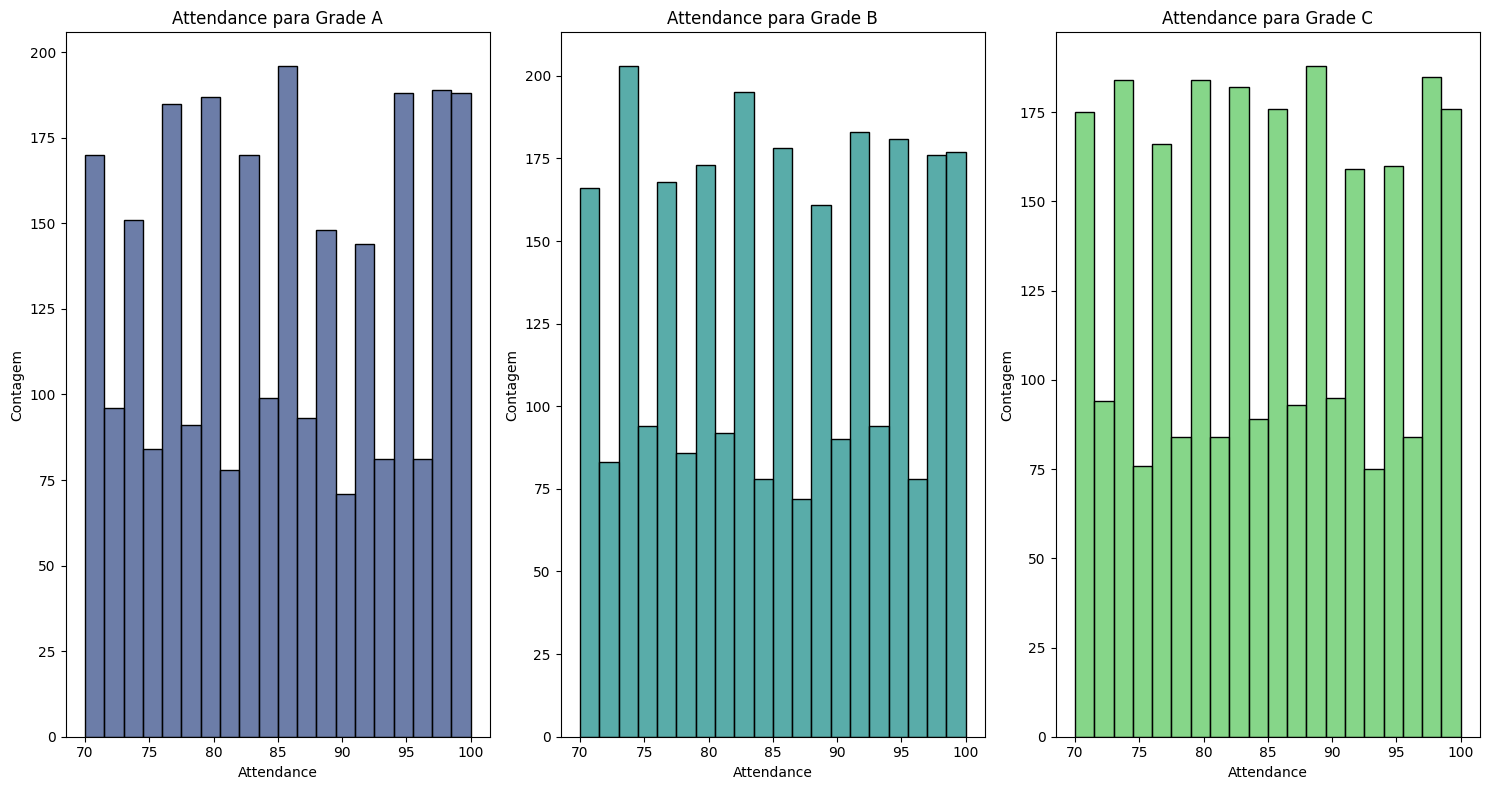

In [96]:
plt.figure(figsize=(15, 8))

grades = ['A', 'B', 'C']
for i, grade in enumerate(grades, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df_unistudents[df_unistudents['Grades'] == grade], x='Attendance', bins=20, kde=False, color=sns.color_palette("viridis", 3)[i-1])
    plt.title(f'Attendance para Grade {grade}')
    plt.xlabel('Attendance')
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

#### Ajuste dos valores nulos e categóricos

Diante da baixa relação entre os únicos atuais valores numéricos presentes, é pertinente transformar os valores categóricos possíveis em numéricos para realizar uma análise mais completa, remover os nulos e os duplicados (neste caso, não há valores duplicados conforme avaliado anteriormente):

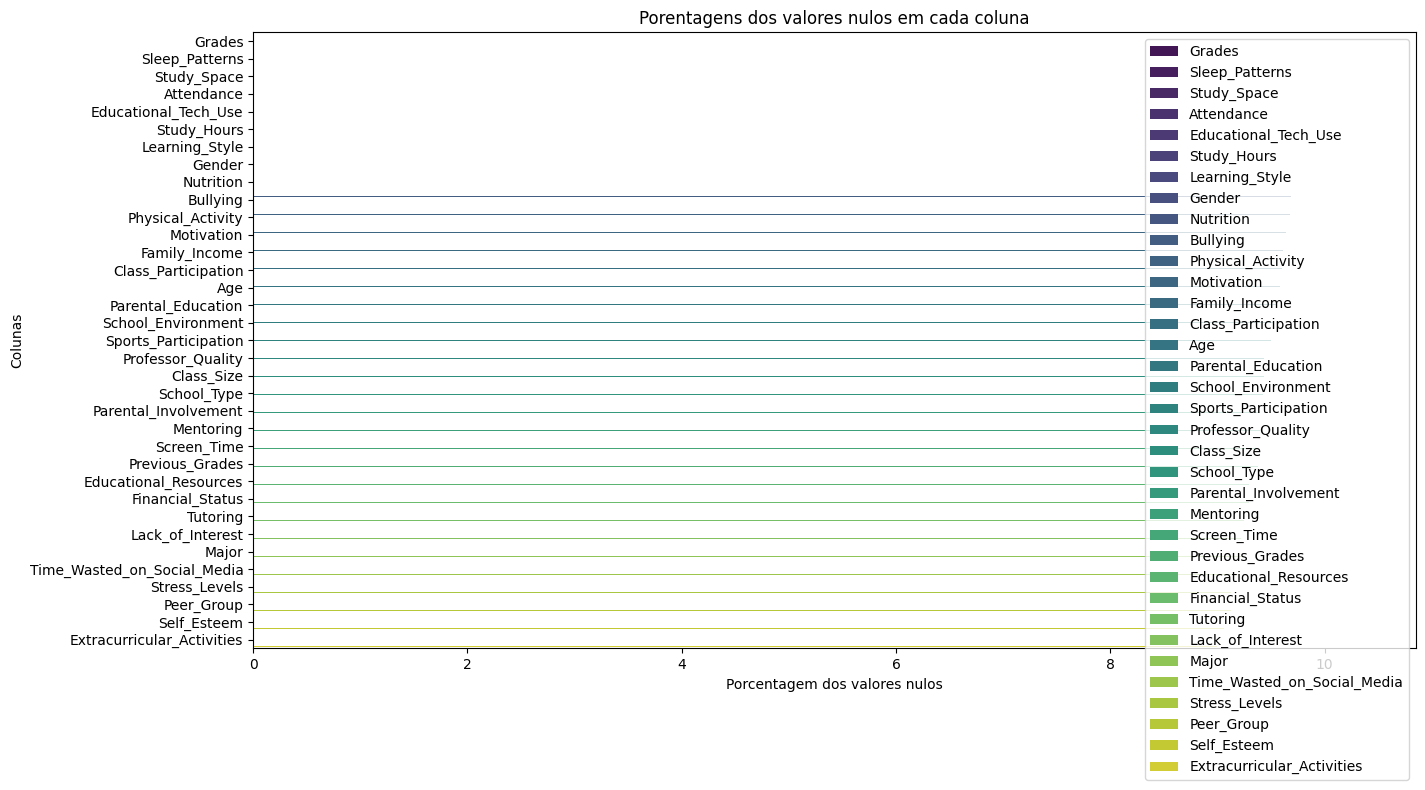

In [97]:
def valores_nulos(df):
    percentual_faltante = df.isnull().sum() / len(df) * 100

    percentual_faltante = percentual_faltante[percentual_faltante > 0]
    
    percentual_faltante.sort_values(ascending=False, inplace=True)
    
    plt.figure(figsize=(15,8))
    sns.barplot(x=percentual_faltante.values, y=percentual_faltante.index, palette='viridis', hue=percentual_faltante.index)
    plt.xlabel('Porcentagem dos valores nulos')
    plt.ylabel('Colunas')
    plt.title('Porentagens dos valores nulos em cada coluna')
    plt.show()

valores_nulos(df_unistudents)

Para a coluna `Family_Income` especificamente, que está com o tipo 'object', faremos uma troca individual por uma outra maneira, pois ela apresenta valores numéricos (ex.: 7000, 3500, etc), mas que estavam regisgtrados no .csv como 'object'

In [138]:
# Converte a coluna 'Family_Income' para float64, tratando valores NaN
df_unistudents['Family_Income'] = pd.to_numeric(df_unistudents['Family_Income'], errors='coerce')

df_unistudents['Family_Income'].dtype

dtype('float64')

Vamos excluir as linhas com valores nulos:

In [99]:
df_unistudents.dropna(inplace=True)

Vamos trocar os valores categóricos para numéricos:

In [139]:
from sklearn.preprocessing import LabelEncoder

# Lista de colunas categóricas sem considerar a 'Family_Income'
colunas_categoricas = ['Gender', 'Parental_Education', 'Previous_Grades', 'Class_Participation', 'Major', 'School_Type', 'Financial_Status', 'Parental_Involvement', 'Educational_Resources', 'Motivation', 'Self_Esteem', 'Stress_Levels', 'School_Environment', 'Professor_Quality', 'Extracurricular_Activities', 'Nutrition', 'Physical_Activity', 'Educational_Tech_Use', 'Peer_Group', 'Bullying', 'Study_Space', 'Learning_Style', 'Tutoring', 'Mentoring', 'Lack_of_Interest', 'Sports_Participation', 'Grades']


label_encoder = LabelEncoder()

# Aplica o LabelEncoder a cada coluna categórica
for column in colunas_categoricas:
    df_unistudents[column] = label_encoder.fit_transform(df_unistudents[column].astype(str))
    
    unique_values = df_unistudents[column].unique()
    inverse_transformed = label_encoder.inverse_transform(unique_values)
    print(f"Coluna: {column}")
    for original, transformed in zip(inverse_transformed, unique_values):
        print(f"{original} -> {transformed}")
    print("\n")

Coluna: Gender
F -> 0
M -> 1
nan -> 2


Coluna: Parental_Education
College -> 0
nan -> 4
High School -> 2
Graduate -> 1
Some College -> 3


Coluna: Previous_Grades
A -> 0
C -> 2
nan -> 3
B -> 1


Coluna: Class_Participation
Medium -> 2
Low -> 1
High -> 0
nan -> 3


Coluna: Major
Law -> 3
Business -> 1
Medicine -> 4
Arts -> 0
Engineering -> 2
Science -> 5
nan -> 6


Coluna: School_Type
Private -> 0
Public -> 1
nan -> 2


Coluna: Financial_Status
Low -> 1
Medium -> 2
High -> 0
nan -> 3


Coluna: Parental_Involvement
High -> 0
Low -> 1
Medium -> 2
nan -> 3


Coluna: Educational_Resources
Yes -> 1
No -> 0
nan -> 2


Coluna: Motivation
Medium -> 2
nan -> 3
Low -> 1
High -> 0


Coluna: Self_Esteem
Low -> 1
High -> 0
Medium -> 2
nan -> 3


Coluna: Stress_Levels
High -> 0
nan -> 3
Medium -> 2
Low -> 1


Coluna: School_Environment
Negative -> 0
Positive -> 2
Neutral -> 1
nan -> 3


Coluna: Professor_Quality
Medium -> 2
High -> 0
nan -> 3
Low -> 1


Coluna: Extracurricular_Activities
Yes -> 1
No

In [140]:
df_unistudents.isnull().sum()

Age                             965
Gender                            0
Parental_Education                0
Family_Income                   968
Previous_Grades                   0
Attendance                     1004
Class_Participation               0
Study_Hours                     991
Major                             0
School_Type                       0
Financial_Status                  0
Parental_Involvement              0
Educational_Resources             0
Motivation                        0
Self_Esteem                       0
Stress_Levels                     0
School_Environment                0
Professor_Quality                 0
Class_Size                      950
Extracurricular_Activities        0
Sleep_Patterns                 1016
Nutrition                         0
Physical_Activity                 0
Screen_Time                     944
Educational_Tech_Use              0
Peer_Group                        0
Bullying                          0
Study_Space                 

In [102]:
df_unistudents.head(25)
df_unistudents.info()

<class 'pandas.core.frame.DataFrame'>
Index: 298 entries, 31 to 10027
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          298 non-null    float64
 1   Gender                       298 non-null    int64  
 2   Parental_Education           298 non-null    int64  
 3   Family_Income                298 non-null    float64
 4   Previous_Grades              298 non-null    int64  
 5   Attendance                   298 non-null    float64
 6   Class_Participation          298 non-null    int64  
 7   Study_Hours                  298 non-null    float64
 8   Major                        298 non-null    int64  
 9   School_Type                  298 non-null    int64  
 10  Financial_Status             298 non-null    int64  
 11  Parental_Involvement         298 non-null    int64  
 12  Educational_Resources        298 non-null    int64  
 13  Motivation            

#### Mudança na estratégia de tratamento dos dados nulos (NaN)

Diante da exclusão das linhas que apresentavam valores nulos (NaN), é nítido que o num. de entradas do dataset reduziu significativamente. Para solucionar o problema da presença de valores nulos, neste caso, excluir as colunas que mais apresentam estes valores não seria viável ao considerar que, mediante a análise realizada, colunas muito relevantes para a EDA, como a `Grades`, estão incluídas nesse meio. Portanto, optamos por substituir os nulos de duas maneiras:

-> Para as colunas numéricas: substituir pela média dos valores da coluna;

-> Para as colunas categóricas: substituir pela moda dos valores da coluna (uma vez que não se pode tirar a média);

Reversão do dataset para o modelo original:

In [141]:
df_unistudents = pd.read_csv('../data/unistudents.csv', low_memory=False)
pd.set_option('display.max_columns', None)

Para a coluna `Family_Income` especificamente, que está com o tipo 'object', faremos uma troca individual por uma outra maneira, pois ela apresenta valores numéricos (ex.: 7000, 3500, etc), mas que estavam regisgtrados no .csv como 'object'

In [142]:
# Converte a coluna 'Family_Income' para float64, tratando valores NaN
df_unistudents['Family_Income'] = pd.to_numeric(df_unistudents['Family_Income'], errors='coerce')

df_unistudents['Family_Income'].dtype

dtype('float64')

Substituição dos valores nulos pela média e pela moda de suas respectivas colunas:

In [143]:
# Substituição por média e moda

from sklearn.impute import SimpleImputer

# Numericas
num_imputer = SimpleImputer(strategy='mean')
num_col = df_unistudents.select_dtypes(include=['float64', 'int32']).columns
df_unistudents[num_col] = num_imputer.fit_transform(df_unistudents[num_col])
df_unistudents[num_col] = df_unistudents[num_col].apply(np.round)

# Categoricas
cat_imputer = SimpleImputer(strategy='most_frequent')
cat_col = df_unistudents.select_dtypes(include=['object']).columns
df_unistudents[cat_col] = cat_imputer.fit_transform(df_unistudents[cat_col])

Vamos trocar os valores categóricos para numéricos:

In [144]:
from sklearn.preprocessing import LabelEncoder

# Lista de colunas categóricas sem considerar a 'Family_Income'
colunas_categoricas = ['Gender', 'Parental_Education', 'Previous_Grades', 'Class_Participation', 'Major', 'School_Type', 'Financial_Status', 'Parental_Involvement', 'Educational_Resources', 'Motivation', 'Self_Esteem', 'Stress_Levels', 'School_Environment', 'Professor_Quality', 'Extracurricular_Activities', 'Nutrition', 'Physical_Activity', 'Educational_Tech_Use', 'Peer_Group', 'Bullying', 'Study_Space', 'Learning_Style', 'Tutoring', 'Mentoring', 'Lack_of_Interest', 'Sports_Participation', 'Grades']


label_encoder = LabelEncoder()

# Aplica o LabelEncoder a cada coluna categórica
for column in colunas_categoricas:
    df_unistudents[column] = label_encoder.fit_transform(df_unistudents[column].astype(str))
    
    unique_values = df_unistudents[column].unique()
    inverse_transformed = label_encoder.inverse_transform(unique_values)
    print(f"Coluna: {column}")
    for original, transformed in zip(inverse_transformed, unique_values):
        print(f"{original} -> {transformed}")
    print("\n")

Coluna: Gender
F -> 0
M -> 1


Coluna: Parental_Education
College -> 0
Some College -> 3
High School -> 2
Graduate -> 1


Coluna: Previous_Grades
A -> 0
C -> 2
B -> 1


Coluna: Class_Participation
Medium -> 2
Low -> 1
High -> 0


Coluna: Major
Law -> 3
Business -> 1
Medicine -> 4
Arts -> 0
Engineering -> 2
Science -> 5


Coluna: School_Type
Private -> 0
Public -> 1


Coluna: Financial_Status
Low -> 1
Medium -> 2
High -> 0


Coluna: Parental_Involvement
High -> 0
Low -> 1
Medium -> 2


Coluna: Educational_Resources
Yes -> 1
No -> 0


Coluna: Motivation
Medium -> 2
High -> 0
Low -> 1


Coluna: Self_Esteem
Low -> 1
High -> 0
Medium -> 2


Coluna: Stress_Levels
High -> 0
Low -> 1
Medium -> 2


Coluna: School_Environment
Negative -> 0
Positive -> 2
Neutral -> 1


Coluna: Professor_Quality
Medium -> 2
High -> 0
Low -> 1


Coluna: Extracurricular_Activities
Yes -> 1
No -> 0


Coluna: Nutrition
Unhealthy -> 2
Healthy -> 1
Balanced -> 0


Coluna: Physical_Activity
Low -> 1
High -> 0
Medium -> 2

In [145]:
df_unistudents.isnull().sum()

Age                            0
Gender                         0
Parental_Education             0
Family_Income                  0
Previous_Grades                0
Attendance                     0
Class_Participation            0
Study_Hours                    0
Major                          0
School_Type                    0
Financial_Status               0
Parental_Involvement           0
Educational_Resources          0
Motivation                     0
Self_Esteem                    0
Stress_Levels                  0
School_Environment             0
Professor_Quality              0
Class_Size                     0
Extracurricular_Activities     0
Sleep_Patterns                 0
Nutrition                      0
Physical_Activity              0
Screen_Time                    0
Educational_Tech_Use           0
Peer_Group                     0
Bullying                       0
Study_Space                    0
Learning_Style                 0
Tutoring                       0
Mentoring 

In [108]:
df_unistudents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10064 entries, 0 to 10063
Data columns (total 35 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          10064 non-null  float64
 1   Gender                       10064 non-null  int64  
 2   Parental_Education           10064 non-null  int64  
 3   Family_Income                10064 non-null  float64
 4   Previous_Grades              10064 non-null  int64  
 5   Attendance                   10064 non-null  float64
 6   Class_Participation          10064 non-null  int64  
 7   Study_Hours                  10064 non-null  float64
 8   Major                        10064 non-null  int64  
 9   School_Type                  10064 non-null  int64  
 10  Financial_Status             10064 non-null  int64  
 11  Parental_Involvement         10064 non-null  int64  
 12  Educational_Resources        10064 non-null  int64  
 13  Motivation      

In [109]:
df_unistudents.head(25)

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,Financial_Status,Parental_Involvement,Educational_Resources,Motivation,Self_Esteem,Stress_Levels,School_Environment,Professor_Quality,Class_Size,Extracurricular_Activities,Sleep_Patterns,Nutrition,Physical_Activity,Screen_Time,Educational_Tech_Use,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
0,22.0,0,0,50000.0,0,81.0,2,8.0,3,0,1,0,1,2,1,0,0,2,39.0,1,6.0,2,1,3.0,1,1,1,0,2,1,1,1,2.0,1,1
1,21.0,1,3,60000.0,0,85.0,2,12.0,3,1,1,1,1,0,0,1,0,0,75.0,1,5.0,1,1,9.0,0,0,0,0,0,1,1,2,5.0,0,1
2,19.0,1,0,75000.0,2,93.0,2,12.0,3,0,1,2,0,1,1,0,2,2,46.0,0,6.0,2,0,7.0,0,1,0,1,2,0,0,1,2.0,0,0
3,21.0,1,0,60000.0,0,86.0,1,15.0,1,1,2,1,0,0,2,2,2,0,60.0,1,5.0,0,0,9.0,1,1,0,1,0,1,1,1,3.0,2,2
4,19.0,0,3,40000.0,2,89.0,0,15.0,4,1,2,1,1,0,1,0,0,1,41.0,1,4.0,2,1,9.0,1,2,0,0,0,1,1,2,3.0,0,1
5,19.0,1,0,40000.0,2,82.0,2,14.0,3,0,0,1,1,0,0,1,0,1,60.0,0,8.0,0,2,6.0,1,0,0,1,0,1,0,1,5.0,1,2
6,20.0,0,3,50953.0,0,84.0,1,13.0,3,0,0,2,0,0,0,0,2,0,82.0,1,7.0,1,1,5.0,0,0,1,1,2,0,0,0,5.0,2,0
7,21.0,1,0,40000.0,2,75.0,1,5.0,1,1,0,1,0,0,1,0,2,2,38.0,1,5.0,0,0,6.0,0,2,1,1,2,1,1,0,6.0,0,0
8,19.0,1,2,75000.0,2,73.0,0,10.0,3,1,1,1,0,0,2,1,2,0,52.0,1,7.0,2,2,2.0,1,1,0,0,0,0,1,1,4.0,0,1
9,21.0,0,1,30000.0,0,81.0,0,6.0,0,0,0,1,1,0,2,0,1,1,41.0,0,6.0,0,2,2.0,1,0,0,0,2,1,1,0,2.0,0,1


#### Perante as alterações realizadas, elaboramos uma nova matriz de correlação:

/home/notsogreatdavi/Documents/PISI3-2024.2/venv/lib/python3.10/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


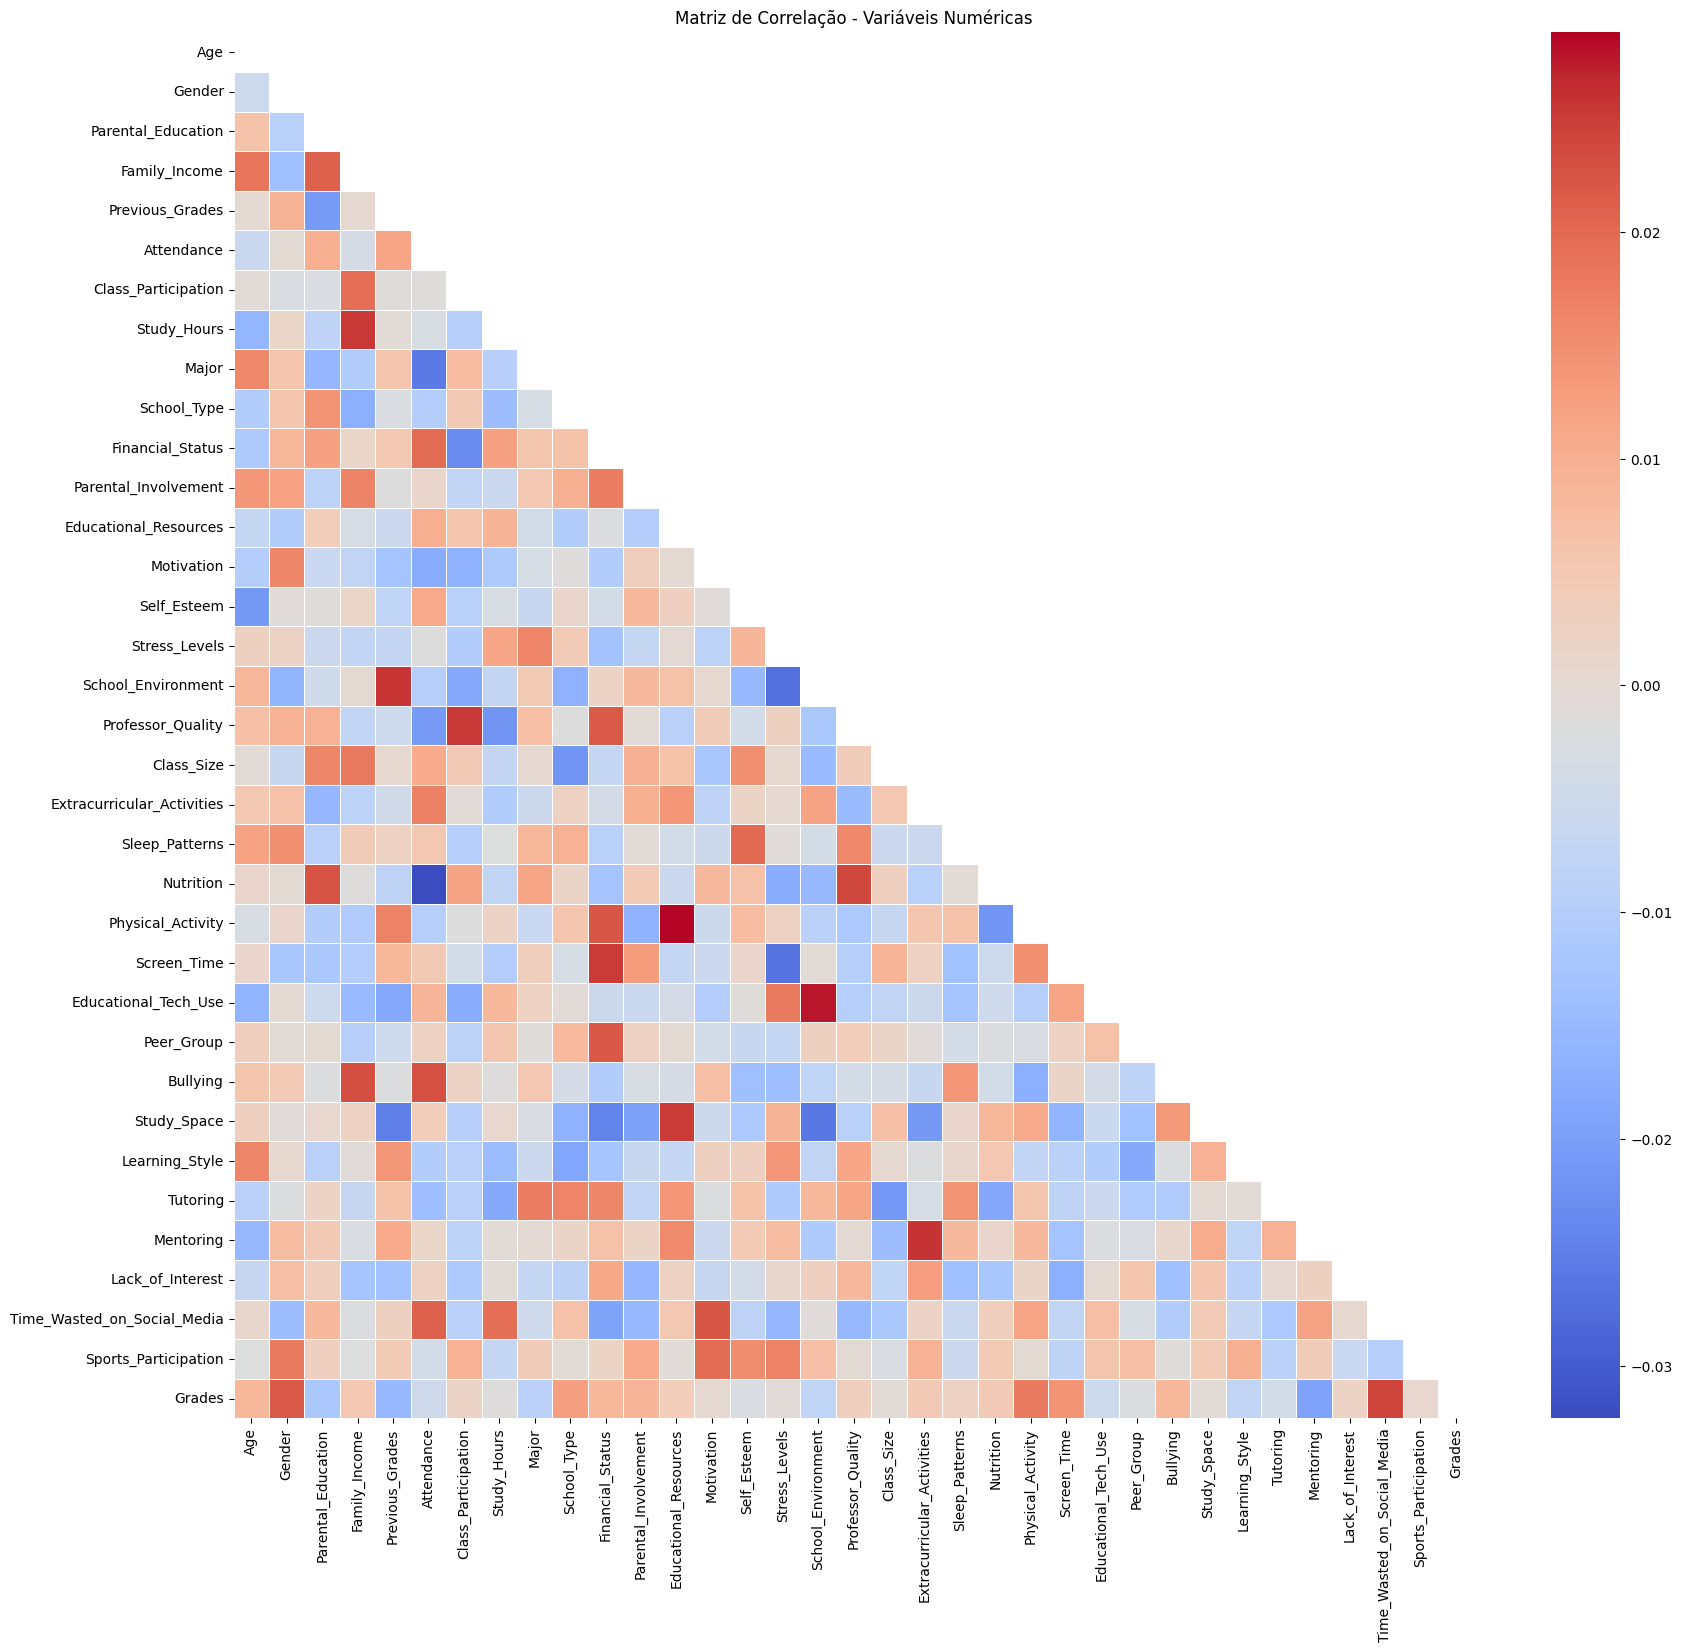

In [110]:
cols = df_unistudents.columns

matriz_corr=df_unistudents[cols].corr()

mascara=np.triu(np.ones_like(matriz_corr,dtype=bool))

plt.figure(figsize=(20, 18))
sns.heatmap(matriz_corr, annot=True, mask=mascara, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.show()

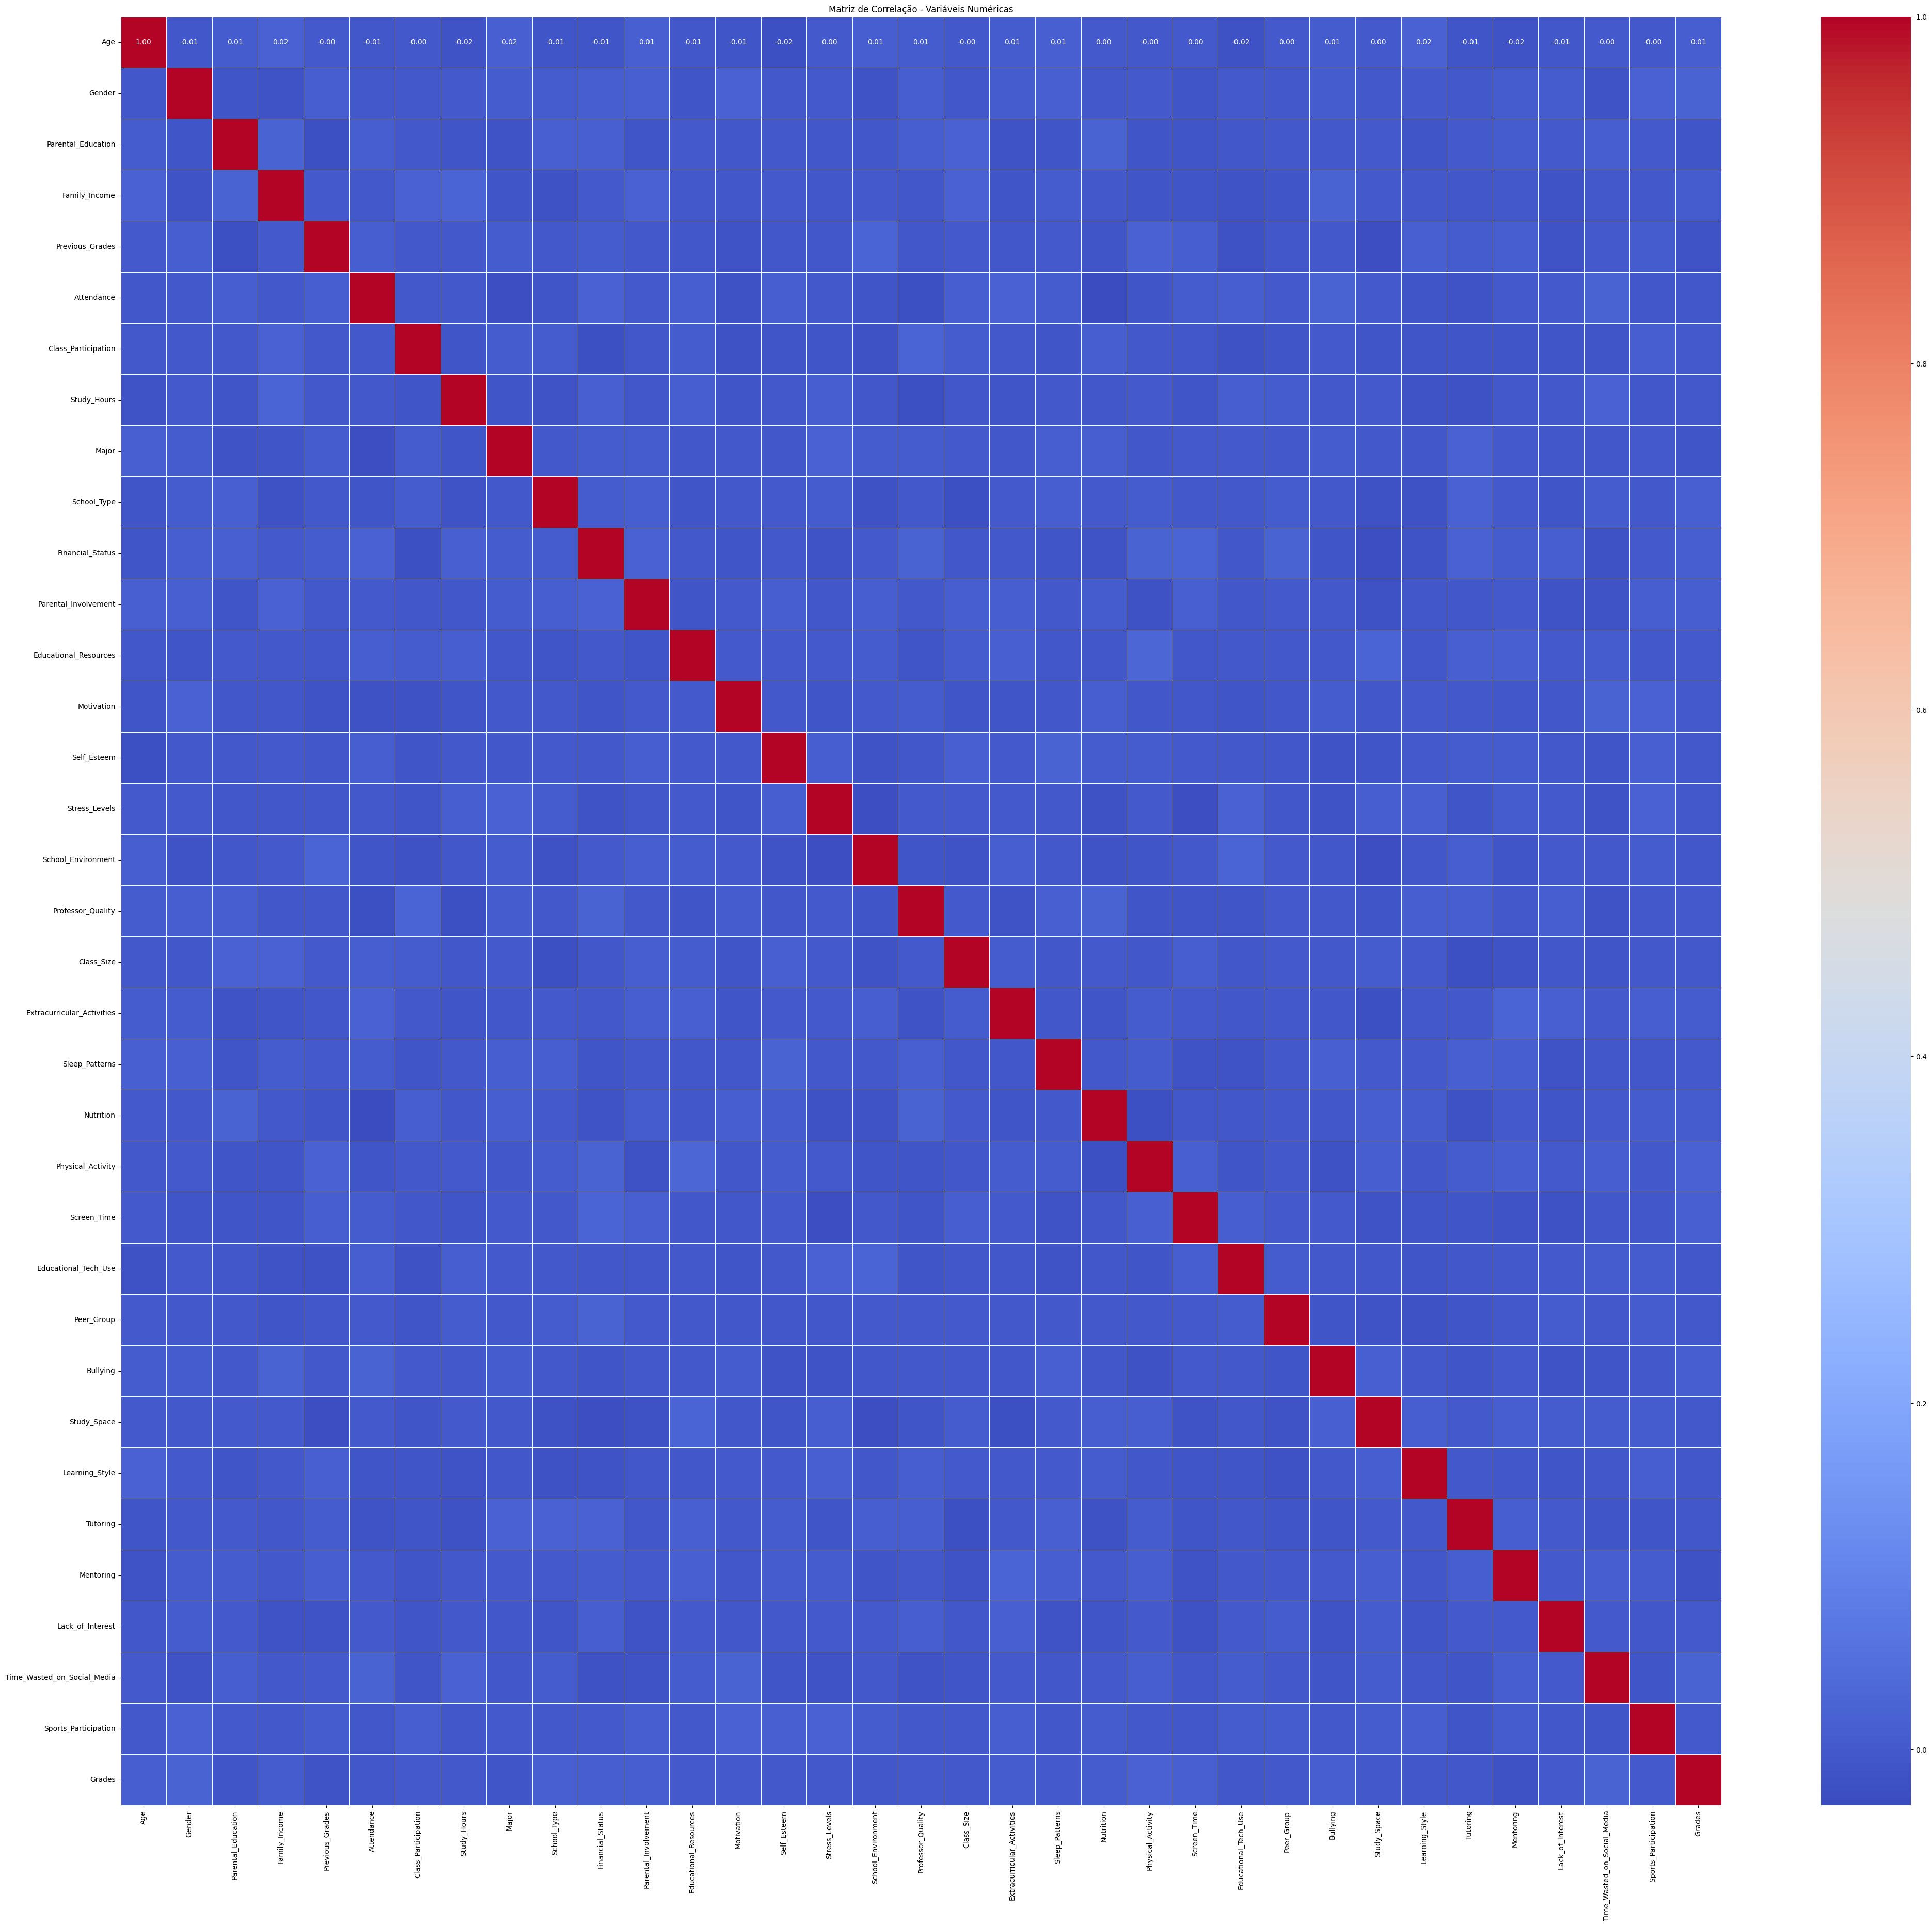

In [111]:
correlation_matrix = df_unistudents[cols].corr()

plt.figure(figsize=(50, 45))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriz de Correlação - Variáveis Numéricas")
plt.show()

##### Agora, iremos repetir a análise com os gráficos, entretando, com o dataset limpo e organizado desta vez:

/tmp/ipykernel_6065/2848463112.py:23: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


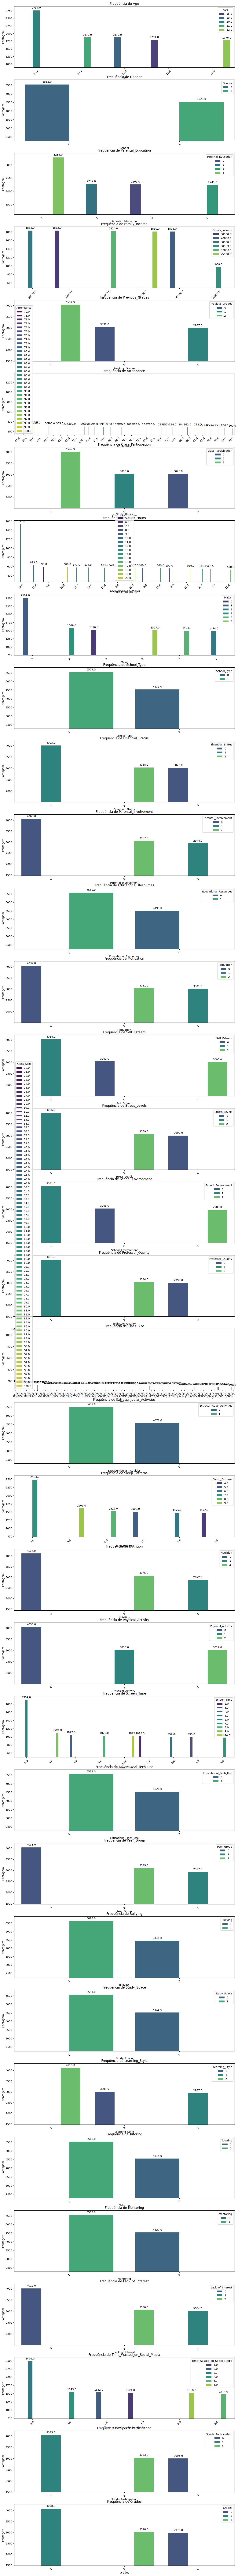

In [112]:
cols_plots = len(cols)
num_cols = 1
num_linhas = math.ceil(cols_plots / num_cols)

plt.figure(figsize=(15, 5 * num_linhas))
for i, var in enumerate(cols, 1):
    plt.subplot(num_linhas, num_cols, i)
    ax = sns.countplot(data=df_unistudents, x=var, order=df_unistudents[var].value_counts().index, palette="viridis", hue=var)
    
    max_count = df_unistudents[var].value_counts().max()
    min_count = df_unistudents[var].value_counts().min()
    
    plt.ylim(min_count - min_count * 0.50, max_count + max_count * 0.05)
    5
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
    plt.title(f'Frequência de {var}')
    plt.xticks(rotation=45)
    plt.xlabel(var)
    plt.ylabel('Contagem')

plt.tight_layout()
plt.show()

In [113]:
df_unistudents.describe()
df_unistudents.mode()

,Age,Gender,Parental_Education,Family_Income,Previous_Grades,Attendance,Class_Participation,Study_Hours,Major,School_Type,Financial_Status,Parental_Involvement,Educational_Resources,Motivation,Self_Esteem,Stress_Levels,School_Environment,Professor_Quality,Class_Size,Extracurricular_Activities,Sleep_Patterns,Nutrition,Physical_Activity,Screen_Time,Educational_Tech_Use,Peer_Group,Bullying,Study_Space,Learning_Style,Tutoring,Mentoring,Lack_of_Interest,Time_Wasted_on_Social_Media,Sports_Participation,Grades
0,20.0,0.0,3.0,30000.0,2.0,85.0,2.0,12.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,60.0,1.0,7.0,0.0,0.0,6.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,3.0,1.0,1.0
1,NaN,NaN,NaN,50000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
df_unistudents.to_csv("unistudents.csv", index=False)